          0         1         2         3         4         5         6  \
0 -3.377854  2.658910 -0.901709  0.713414  0.263779  0.153101  0.020035   
1 -3.634409  2.461742 -0.330745  0.666732  0.114704  0.077022  0.013144   
2 -3.633070  2.380264 -0.773699  0.568343  0.213344  0.079227  0.183560   
3 -3.511753  2.567941 -0.272949  0.645954  0.054987  0.458828 -0.091669   
4 -3.201873  2.875154 -0.595753  0.609161  0.364769  0.547827 -0.348477   

          7         8         9        10        11        12        13  \
0  0.229549  0.047031  0.059600  0.119675 -0.009291 -0.042224  0.007237   
1  0.309126  0.040504  0.040129 -0.062453 -0.011601 -0.121201 -0.005518   
2  0.203995  0.075729  0.119025  0.121571  0.130449 -0.013451  0.046696   
3  0.447149 -0.226479  0.166235 -0.085491  0.115480 -0.218244  0.052470   
4  0.048760 -0.012244  0.080118 -0.348288 -0.006668  0.136041 -0.025508   

         14        15        16        17        18        19  
0 -0.074802  0.068870  0.099928 -0

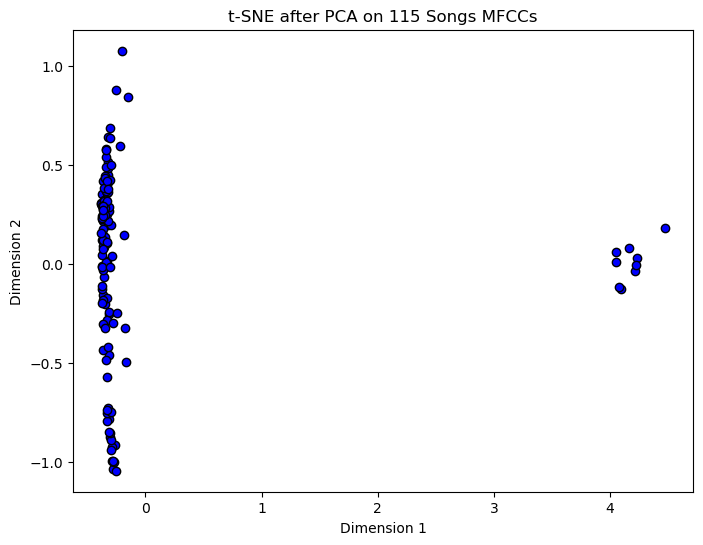

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



import pandas as pd

mfcc_df = pd.read_csv('MFCC_Meaned_20_with_Song_Names.csv')

song_names = mfcc_df['Song']  # Save the 'Song' column
mfcc_df = mfcc_df.drop(columns=['Song'])  # Use only the MFCC coefficients for PCA and t-SNE
print(mfcc_df.head())

# Step 1: Apply PCA to reduce dimensionality to, say, 10 components


pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_df)


# Convert t-SNE result to a DataFrame for easy handling
mfcc_pca_df = pd.DataFrame(mfcc_pca, columns=['Dimension 1', 'Dimension 2'])


# Plot the results of t-SNE after PCA
plt.figure(figsize=(8, 6))
plt.scatter(mfcc_pca_df['Dimension 1'], mfcc_pca_df['Dimension 2'], c='blue', edgecolor='k')
plt.title('t-SNE after PCA on 115 Songs MFCCs')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

mfcc_pca_df['Song'] = song_names  # Add the 'Song' column back to the t-SNE results

mfcc_pca_df.to_csv('PCA.csv')